In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn aif360 mlflow

# Data Loading and Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from aif360.datasets import BinaryLabelDataset,StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
from aif360.algorithms.preprocessing import Reweighing, DisparateImpactRemover

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

from aif360.datasets import BankDataset


import mlflow
import mlflow.sklearn

/opt/anaconda3/lib/python3.11/site-packages/inFairness/utils/ndcg.py:37: FutureWarning: We've integrated functorch into PyTorch. As the final step of the integration, `functorch.vmap` is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use `torch.vmap` instead; see the PyTorch 2.0 release notes and/or the `torch.func` migration guide for more details https://pytorch.org/docs/main/func.migrating.html
  vect_normalized_discounted_cumulative_gain = vmap(
/opt/anaconda3/lib/python3.11/site-packages/inFairness/utils/ndcg.py:48: FutureWarning: We've integrated functorch into PyTorch. As the final step of the integration, `functorch.vmap` is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use `torch.vmap` instead; see the PyTorch 2.0 release notes and/or the `torch.func` migration guide for more details https://pytorch.org/docs/main/func.migrating.html
  monte_carlo_vect_ndcg = vmap(vect_normalized_di

## Loading Dataset

In [19]:
# Put the dataset in aif360

!mkdir -p /opt/anaconda3/lib/python3.11/site-packages/aif360/data/raw/bank
!mv bank-additional-full.csv /opt/anaconda3/lib/python3.11/site-packages/aif360/data/raw/bank/

In [103]:
# Loading dataset

dataset_binary = BankDataset(
    protected_attribute_names=['age'],           
    privileged_classes=[lambda x: (x >= 25)],
)

df, _ = dataset.convert_to_dataframe()

In [104]:
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month=sep,day_of_week=fri,day_of_week=mon,day_of_week=thu,day_of_week=tue,day_of_week=wed,poutcome=failure,poutcome=nonexistent,poutcome=success,y
0,1.0,261.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,226.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,151.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,307.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,1.0,139.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [105]:
print(f"Number of samples: {df.shape[0]}")

Number of samples: 30488


In [106]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 30488 entries, 0 to 41187
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            30488 non-null  float64
 1   duration                       30488 non-null  float64
 2   campaign                       30488 non-null  float64
 3   pdays                          30488 non-null  float64
 4   previous                       30488 non-null  float64
 5   emp.var.rate                   30488 non-null  float64
 6   cons.price.idx                 30488 non-null  float64
 7   cons.conf.idx                  30488 non-null  float64
 8   euribor3m                      30488 non-null  float64
 9   nr.employed                    30488 non-null  float64
 10  job=admin.                     30488 non-null  float64
 11  job=blue-collar                30488 non-null  float64
 12  job=entrepreneur               30488 non-null  floa

In [107]:
df.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job=admin.', 'job=blue-collar', 'job=entrepreneur', 'job=housemaid',
       'job=management', 'job=retired', 'job=self-employed', 'job=services',
       'job=student', 'job=technician', 'job=unemployed', 'marital=divorced',
       'marital=married', 'marital=single', 'education=basic.4y',
       'education=basic.6y', 'education=basic.9y', 'education=high.school',
       'education=illiterate', 'education=professional.course',
       'education=university.degree', 'default=no', 'default=yes',
       'housing=no', 'housing=yes', 'loan=no', 'loan=yes', 'contact=cellular',
       'contact=telephone', 'month=apr', 'month=aug', 'month=dec', 'month=jul',
       'month=jun', 'month=mar', 'month=may', 'month=nov', 'month=oct',
       'month=sep', 'day_of_week=fri', 'day_of_week=mon', 'day_of_week=thu',
       'day_of_week=tue', 'day_of_week=wed

In [108]:
# Now, we check duplicates and null values
df.isnull().sum()

age                              0
duration                         0
campaign                         0
pdays                            0
previous                         0
emp.var.rate                     0
cons.price.idx                   0
cons.conf.idx                    0
euribor3m                        0
nr.employed                      0
job=admin.                       0
job=blue-collar                  0
job=entrepreneur                 0
job=housemaid                    0
job=management                   0
job=retired                      0
job=self-employed                0
job=services                     0
job=student                      0
job=technician                   0
job=unemployed                   0
marital=divorced                 0
marital=married                  0
marital=single                   0
education=basic.4y               0
education=basic.6y               0
education=basic.9y               0
education=high.school            0
education=illiterate

In [109]:
df.duplicated().value_counts()

False    30448
True        40
Name: count, dtype: int64

In [110]:
df[df.duplicated()]

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month=sep,day_of_week=fri,day_of_week=mon,day_of_week=thu,day_of_week=tue,day_of_week=wed,poutcome=failure,poutcome=nonexistent,poutcome=success,y
871,1.0,294.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.856,5191.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1266,1.0,124.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.855,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2519,1.0,60.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.856,5191.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6352,1.0,157.0,2.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6578,1.0,124.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6779,1.0,172.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7310,1.0,86.0,4.0,999.0,0.0,1.1,93.994,-36.4,4.860,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7932,1.0,121.0,4.0,999.0,0.0,1.4,94.465,-41.8,4.865,5228.1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11768,1.0,27.0,3.0,999.0,0.0,1.4,94.465,-41.8,4.959,5228.1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11856,1.0,21.0,3.0,999.0,0.0,1.4,94.465,-41.8,4.959,5228.1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [111]:
df = df.drop_duplicates()

In [112]:
df.shape

(30448, 58)

In [113]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print(f"There are {len(categorical_cols)} categorical column(s)")

There are 0 categorical column(s)


In [114]:
# Let us also analyze unique values

unique_values = df.nunique()

unique_values_dataframe = unique_values.reset_index()
unique_values_dataframe.columns = ['Column_name', 'Number of unique values']
unique_values_dataframe

,Column_name,Number of unique values
0,age,2
1,duration,1441
2,campaign,41
3,pdays,26
4,previous,8
5,emp.var.rate,10
6,cons.price.idx,26
7,cons.conf.idx,26
8,euribor3m,314
9,nr.employed,11


In [115]:
# Correlations
print(df.corr()['y'].sort_values(ascending=False))

y                                1.000000
duration                         0.393467
poutcome=success                 0.319868
previous                         0.227922
month=mar                        0.146279
contact=cellular                 0.143918
month=oct                        0.141525
month=sep                        0.124353
job=retired                      0.102423
job=student                      0.088579
month=apr                        0.077873
month=dec                        0.074587
cons.conf.idx                    0.061564
education=university.degree      0.046587
marital=single                   0.042254
job=admin.                       0.024190
poutcome=failure                 0.021607
job=unemployed                   0.020859
day_of_week=thu                  0.016696
housing=yes                      0.010095
education=basic.4y               0.009036
day_of_week=tue                  0.008833
education=illiterate             0.008345
day_of_week=wed                  0

In [116]:
correlation_matrix = df.corr().abs()
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
high_correlations = [column for column in upper.columns if any(upper[column] > 0.9)]
print(f"Columns with very high correlation:\n{high_correlations}")

Columns with very high correlation:
['euribor3m', 'nr.employed', 'default=yes', 'housing=yes', 'loan=yes', 'contact=telephone', 'poutcome=success']


In [117]:
correlation_matrix['euribor3m'].sort_values(ascending=False).head(5)

euribor3m               1.000000
emp.var.rate            0.969395
nr.employed             0.944859
cons.price.idx          0.667212
poutcome=nonexistent    0.470611
Name: euribor3m, dtype: float64

In [118]:
correlation_matrix['nr.employed'].sort_values(ascending=False).head(5)

nr.employed       1.000000
euribor3m         0.944859
emp.var.rate      0.900335
cons.price.idx    0.488719
previous          0.488554
Name: nr.employed, dtype: float64

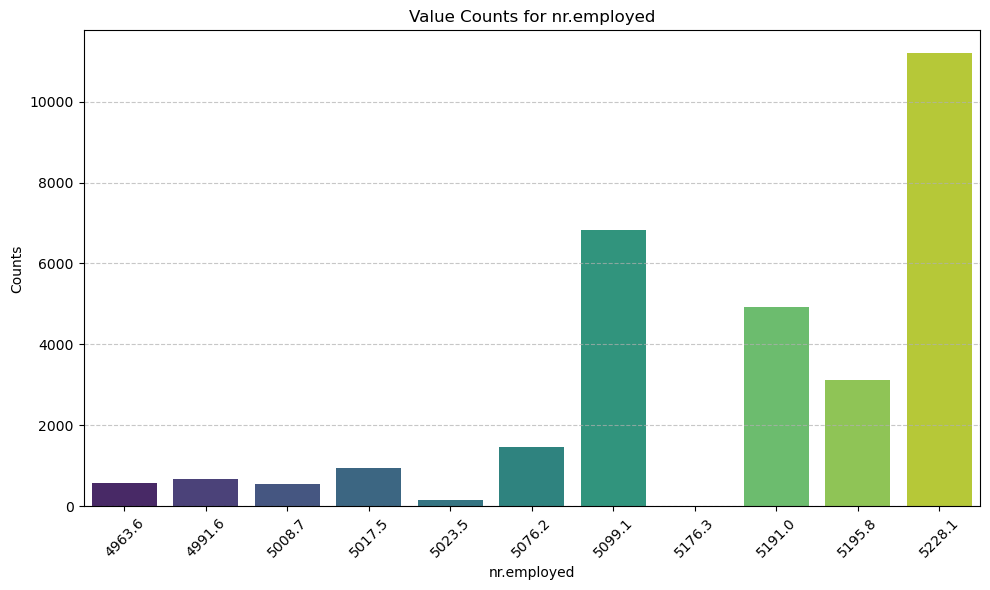

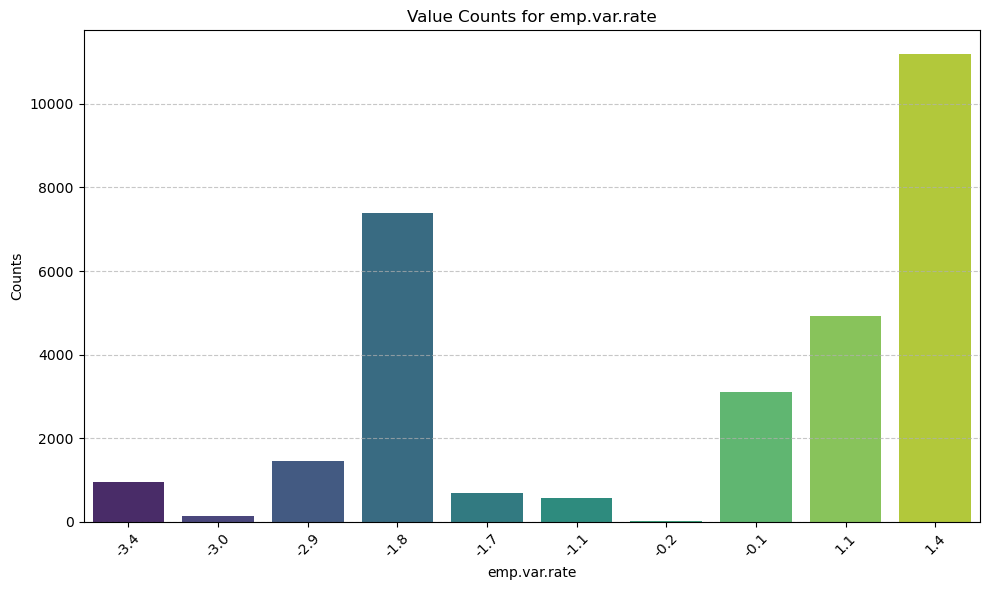

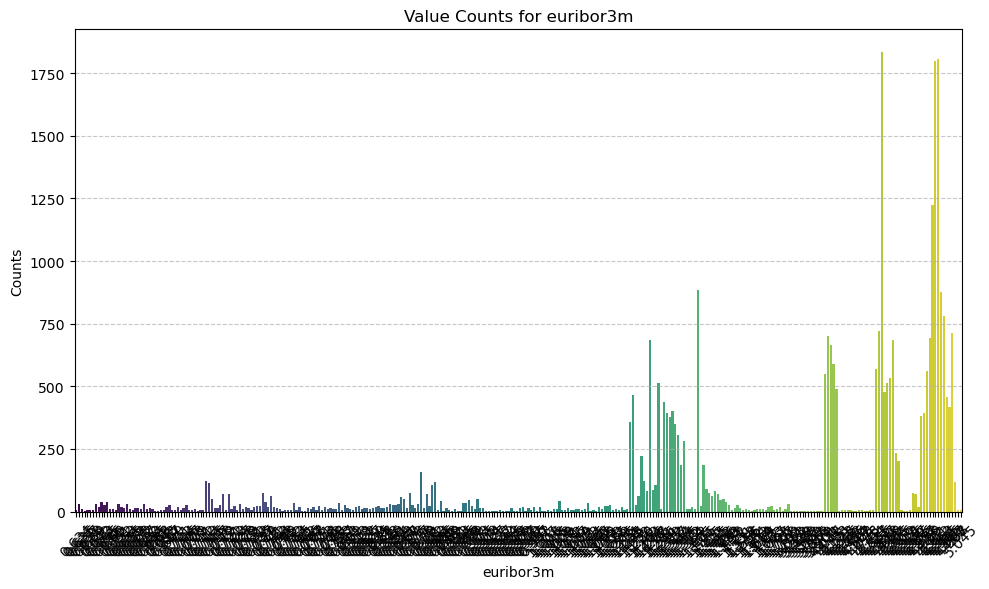

In [119]:
# Function to plot value counts
def plot_value_counts(series, title, xlabel):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=series.index, y=series.values, palette="viridis")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Counts')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


emp_var_rate_counts = df['emp.var.rate'].value_counts()
euribor3m_counts = df['euribor3m'].value_counts()
nr_employed_counts = df['nr.employed'].value_counts()

plot_value_counts(nr_employed_counts, "Value Counts for nr.employed", "nr.employed")
plot_value_counts(emp_var_rate_counts, "Value Counts for emp.var.rate", "emp.var.rate")
plot_value_counts(euribor3m_counts, "Value Counts for euribor3m", "euribor3m")

In [120]:
correlation_matrix['default=yes'].sort_values(ascending=False).head(5)

default=no                       1.000000
default=yes                      1.000000
day_of_week=tue                  0.020149
job=unemployed                   0.019951
education=professional.course    0.014937
Name: default=yes, dtype: float64

In [121]:
correlation_matrix['housing=yes'].sort_values(ascending=False).head(5)

housing=yes          1.000000
housing=no           1.000000
contact=telephone    0.080558
contact=cellular     0.080558
cons.price.idx       0.077686
Name: housing=yes, dtype: float64

In [122]:
correlation_matrix['loan=yes'].sort_values(ascending=False).head(5)

loan=no        1.000000
loan=yes       1.000000
housing=yes    0.046950
housing=no     0.046950
job=admin.     0.023767
Name: loan=yes, dtype: float64

In [123]:
correlation_matrix['contact=telephone'].sort_values(ascending=False).head(5)

contact=telephone    1.000000
contact=cellular     1.000000
cons.price.idx       0.564528
euribor3m            0.384249
emp.var.rate         0.381240
Name: contact=telephone, dtype: float64

In [124]:
correlation_matrix['poutcome=success'].sort_values(ascending=False).head(5)

poutcome=success        1.000000
pdays                   0.951927
previous                0.527356
poutcome=nonexistent    0.475113
nr.employed             0.350471
Name: poutcome=success, dtype: float64

In [125]:
df = df.drop(columns = high_correlations)

In [126]:
df.shape

(30448, 51)

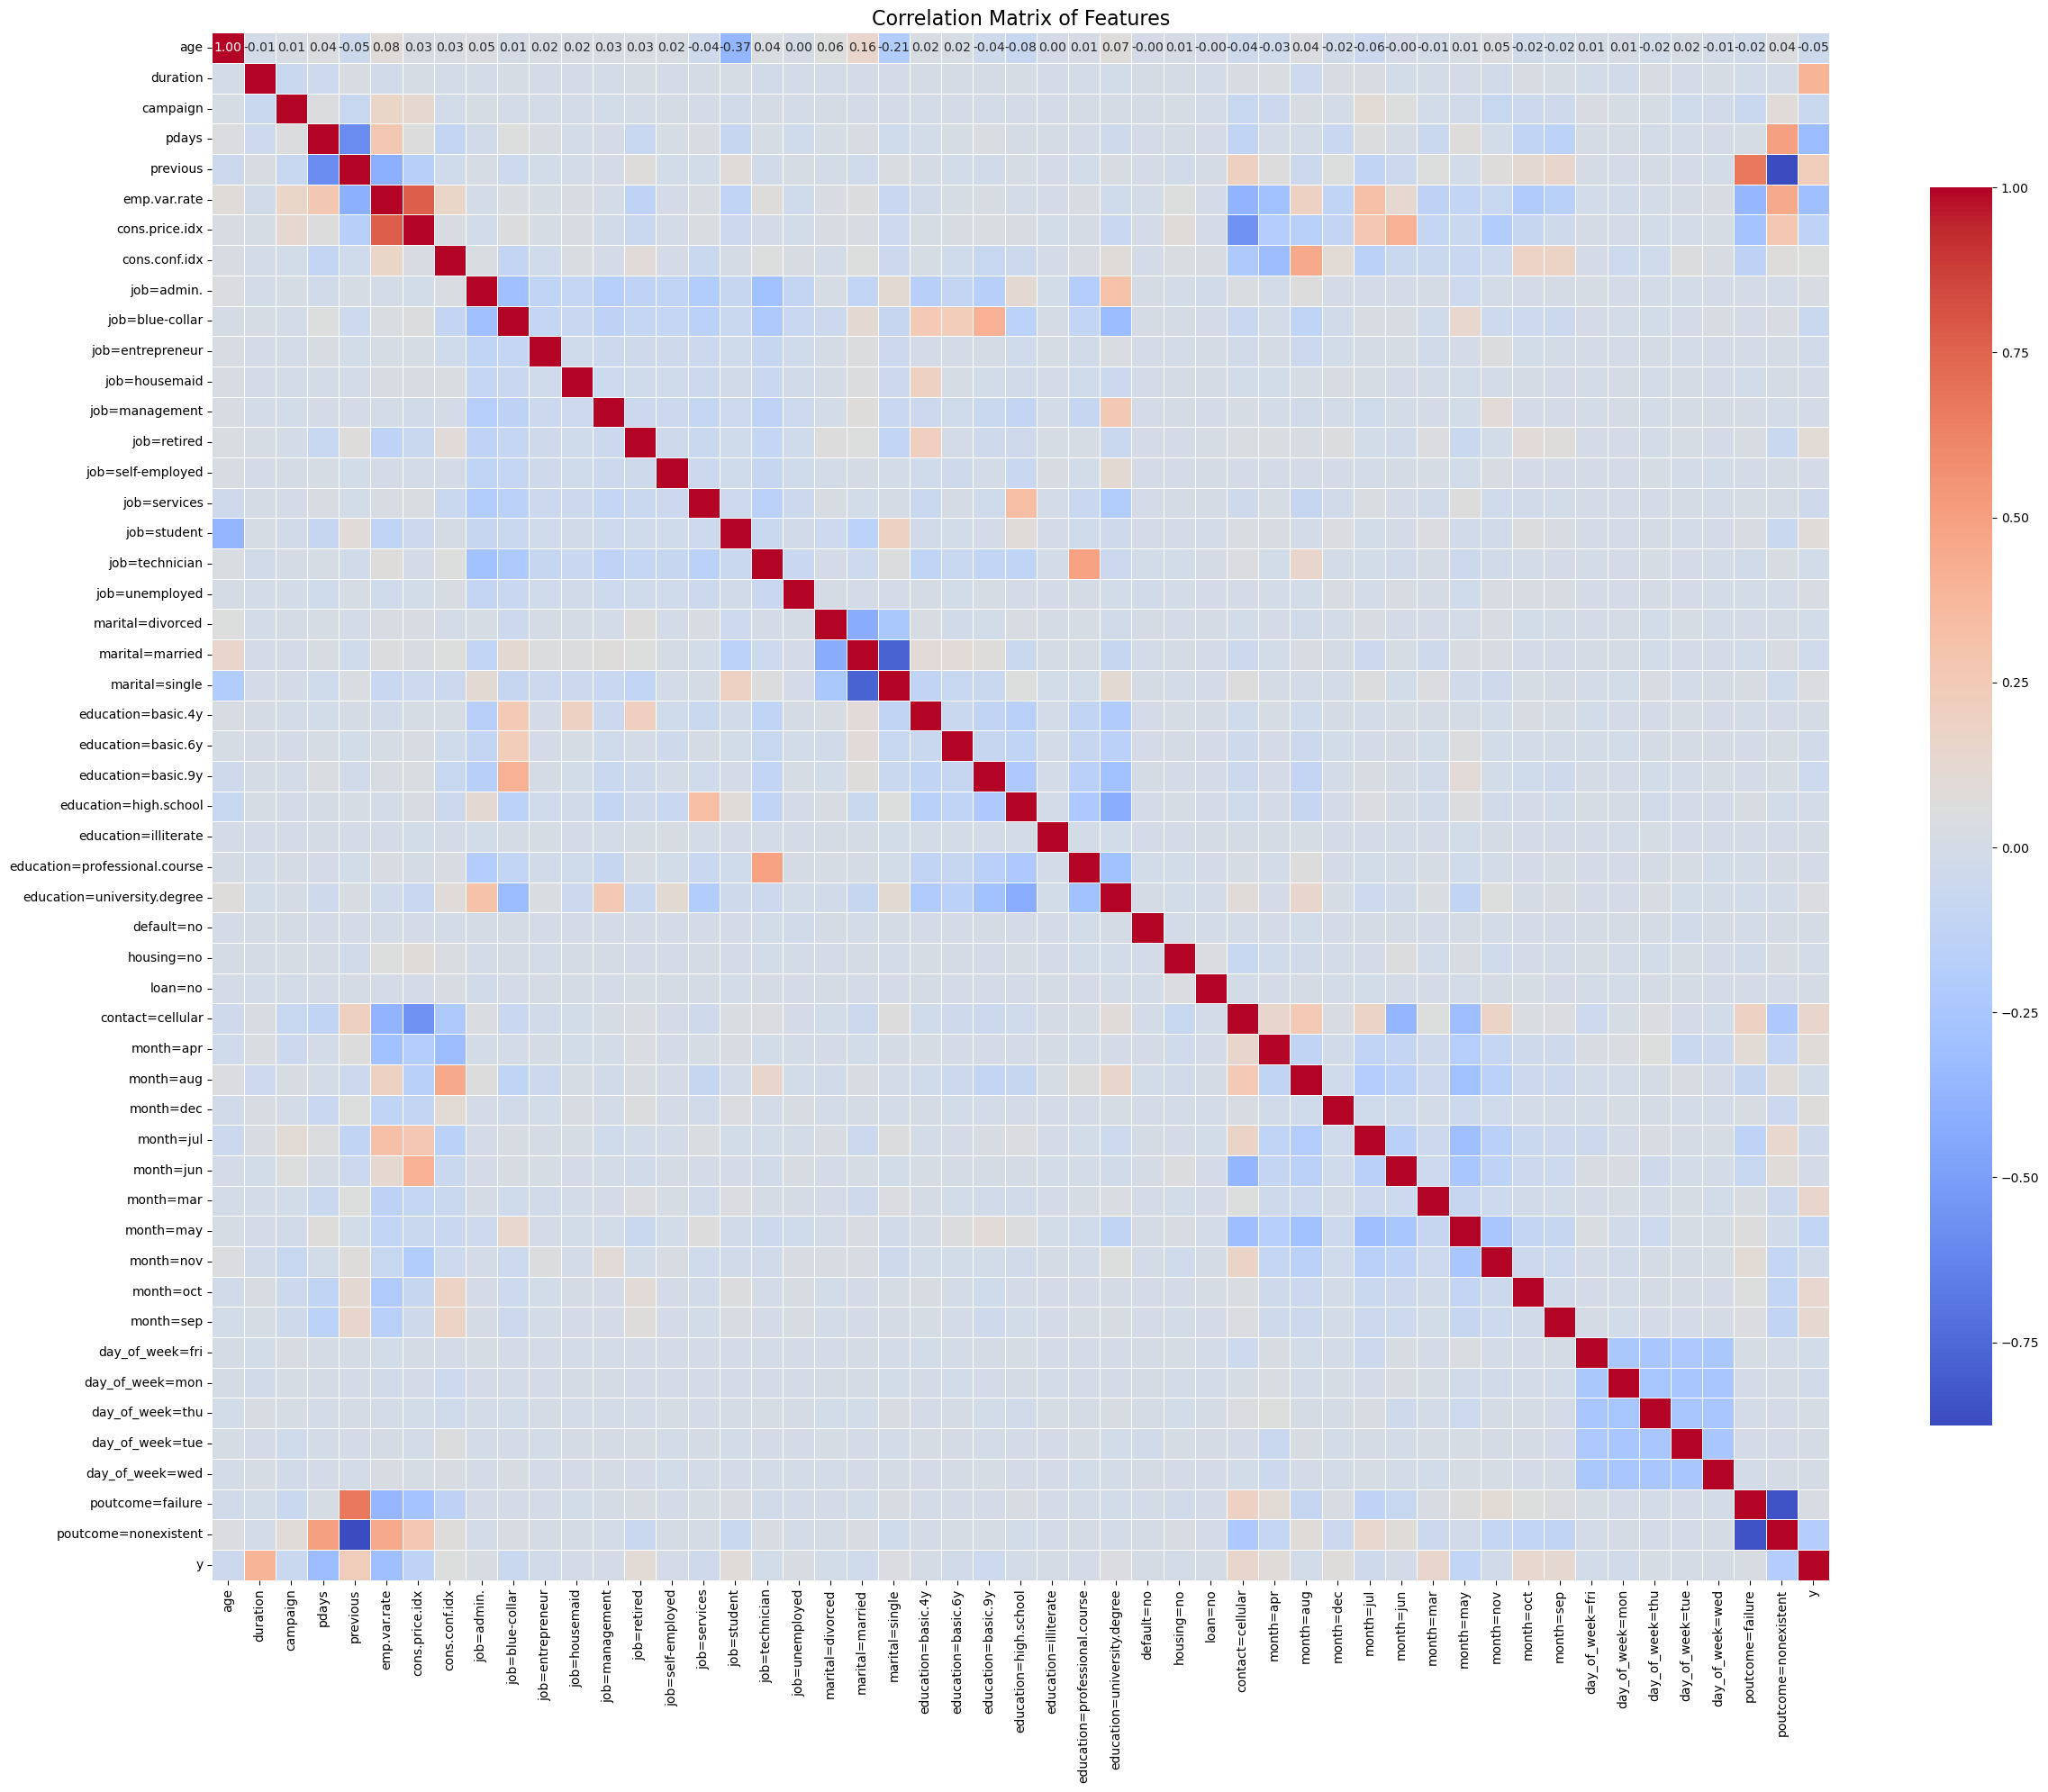

In [135]:
correlation_matrix = df.corr()
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, 
            annot=True,         
            fmt=".2f",           
            cmap='coolwarm',     
            linewidths=0.5,      
            cbar_kws={"shrink": 0.8})


plt.title("Correlation Matrix of Features", fontsize=16)

plt.tight_layout()
plt.show()

In [136]:
df['poutcome=nonexistent'].value_counts()

poutcome=nonexistent
1.0    25796
0.0     4652
Name: count, dtype: int64

In [138]:
df['previous'].value_counts()

previous
0.0    25796
1.0     3752
2.0      633
3.0      190
4.0       56
5.0       16
6.0        4
7.0        1
Name: count, dtype: int64

In [143]:
df = df.drop(columns = ['previous'])

In [146]:
preprocessed_df = df
preprocessed_df.shape

(30448, 50)

In [140]:
# Saving preprocessed data
preprocessed_df.to_csv('preprocessed_bank.csv')

,age,duration,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,job=admin.,job=blue-collar,job=entrepreneur,...,month=oct,month=sep,day_of_week=fri,day_of_week=mon,day_of_week=thu,day_of_week=tue,day_of_week=wed,poutcome=failure,poutcome=nonexistent,y
0,1.0,261.0,1.0,999.0,1.1,93.994,-36.4,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,226.0,1.0,999.0,1.1,93.994,-36.4,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,151.0,1.0,999.0,1.1,93.994,-36.4,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,307.0,1.0,999.0,1.1,93.994,-36.4,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,1.0,139.0,1.0,999.0,1.1,93.994,-36.4,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Modelling

# Modularized Code

In [306]:
'''

Here, we put our final code with all results and visualizetion. At the end, in the section 
"Our Experiments before modularizing the code"  you can see how we conducted experiments

'''

In [265]:
import numpy as np
import pandas as pd
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt

from aif360.datasets import BinaryLabelDataset
from aif360.metrics import ClassificationMetric, BinaryLabelDatasetMetric
from aif360.algorithms.preprocessing import DisparateImpactRemover, Reweighing

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.exceptions import ConvergenceWarning
import warnings

warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [242]:
# Global Parameters

RANDOM_STATE = 42
LABEL_NAME = 'y'
PROTECTED_ATTRIBUTE = 'age'
FAVORABLE_LABEL = 1.0
UNFAVORABLE_LABEL = 0.0
UNPRIVILEGED_GROUP = [{'age': 0.0}]
PRIVILEGED_GROUP = [{'age': 1.0}]
REPAIR_LEVELS = np.linspace(0.1, 1.0, 10)

### Functions

In [243]:
def load_data(filepath):
    df = pd.read_csv(filepath)
    if 'Unnamed: 0' in df.columns:
        df.drop(columns=['Unnamed: 0'], inplace=True)
    return df

In [244]:
def create_binary_label_dataset(df, label_name, protected_attribute, favorable_label, unfavorable_label):
    return BinaryLabelDataset(
        df=df,
        label_names=[label_name],
        protected_attribute_names=[protected_attribute],
        favorable_label=favorable_label,
        unfavorable_label=unfavorable_label
    )

In [245]:
def split_data(df, label_name, test_size=0.3, random_state=RANDOM_STATE):
    df_train, df_test = train_test_split(df, test_size=test_size, random_state=random_state, shuffle=True)
    X_train = df_train.drop(columns=[label_name])
    y_train = df_train[label_name]
    X_test = df_test.drop(columns=[label_name])
    y_test = df_test[label_name]
    return X_train, X_test, y_train, y_test, df_train, df_test

In [246]:
def apply_dir(binary_dataset, repair_level):
    dir_transformer = DisparateImpactRemover(repair_level=repair_level)
    transformed_dataset = dir_transformer.fit_transform(binary_dataset)
    transformed_df, _ = transformed_dataset.convert_to_dataframe()
    return transformed_df

In [247]:
def apply_reweighing(binary_dataset_train, unprivileged_groups, privileged_groups):
    reweigher = Reweighing(unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
    reweighed_dataset = reweigher.fit_transform(binary_dataset_train)
    reweighed_df, _ = reweighed_dataset.convert_to_dataframe()
    return reweighed_df, reweighed_dataset.instance_weights

In [248]:
def train_model(model, X_train, y_train, sample_weight=None):
    model.fit(X_train, y_train, sample_weight=sample_weight)
    return model

In [249]:
def evaluate_performance(model, X_test, y_test):
    predictions = model.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    return predictions, acc, f1

In [250]:
def evaluate_fairness(df_test, predictions, label_name, protected_attribute, unprivileged_groups, privileged_groups):
    test_dataset = BinaryLabelDataset(
        df=df_test,
        label_names=[label_name],
        protected_attribute_names=[protected_attribute],
        favorable_label=FAVORABLE_LABEL,
        unfavorable_label=UNFAVORABLE_LABEL
    )
    predicted_dataset = test_dataset.copy(deepcopy=True)
    predicted_dataset.labels = predictions.reshape(-1,1)

    class_metric = ClassificationMetric(
        test_dataset,
        predicted_dataset,
        unprivileged_groups=unprivileged_groups,
        privileged_groups=privileged_groups
    )

    fairness_metrics = {
        'Disparate Impact': class_metric.disparate_impact(),
        'Statistical Parity Difference': class_metric.statistical_parity_difference(),
        'Equal Opportunity Difference': class_metric.equal_opportunity_difference(),
        'Average Odds Difference': class_metric.average_odds_difference()
    }
    return fairness_metrics

In [251]:
def get_best_rf_params(X, y):
    # Perform Grid Search once on original data
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }

    grid_search = GridSearchCV(
        estimator=RandomForestClassifier(random_state=RANDOM_STATE),
        param_grid=param_grid,
        cv=3, scoring='f1', n_jobs=-1, verbose=0
    )
    grid_search.fit(X, y)
    return grid_search.best_params_

# Main

In [269]:
df = load_data("preprocessed_bank.csv")

binary_dataset = create_binary_label_dataset(
    df, LABEL_NAME, PROTECTED_ATTRIBUTE, FAVORABLE_LABEL, UNFAVORABLE_LABEL
)

In [270]:
# Initial fairness metrics on full dataset (not model-based, just distribution)
dataset_metric = BinaryLabelDatasetMetric(
    binary_dataset,
    unprivileged_groups=UNPRIVILEGED_GROUP,
    privileged_groups=PRIVILEGED_GROUP
)
print("Initial Dataset Fairness Metrics:")
print(f"  Disparate Impact: {dataset_metric.disparate_impact():.2f}")
print(f"  Statistical Parity Difference: {dataset_metric.mean_difference():.2f}\n")

Initial Dataset Fairness Metrics:
  Disparate Impact: 1.86
  Statistical Parity Difference: 0.11



In [271]:
# Split original data
X_train_original, X_test_original, y_train_original, y_test_original, df_train_original, df_test_original = split_data(df, LABEL_NAME)

In [272]:
# Prepare Reweighing Data
binary_dataset_train = create_binary_label_dataset(
    df_train_original, LABEL_NAME, PROTECTED_ATTRIBUTE, FAVORABLE_LABEL, UNFAVORABLE_LABEL
)
reweighed_df_train, sample_weights_rew = apply_reweighing(binary_dataset_train, UNPRIVILEGED_GROUP, PRIVILEGED_GROUP)
X_train_rw = reweighed_df_train.drop(columns=[LABEL_NAME])
y_train_rw = reweighed_df_train[LABEL_NAME]

In [256]:
# Prepare best RF parameters from original data
best_rf_params = get_best_rf_params(X_train_original, y_train_original)
print("Best Random Forest Params:", best_rf_params)

Best Random Forest Params: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [273]:
# Models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000, random_state=RANDOM_STATE),
    'HistGradientBoosting': HistGradientBoostingClassifier(random_state=RANDOM_STATE),
    'Random Forest': RandomForestClassifier(random_state=RANDOM_STATE, **best_rf_params)
}

In [278]:
# MLflow Experiment Setup
# !mkdir -p /Users/khaleed_mammad/Desktop/Khaleed/ADA_Semesters/Fall_2024/Machine\ Learning/Course_Project/mlruns
# !mkdir -p "/Users/khaleed_mammad/Desktop/Khaleed/ADA_Semesters/Fall_2024/Machine Learning/Course_Project/mlruns/.trash"
mlflow.set_experiment("Fairness_Comparison")
results = []

2024/12/07 17:31:55 INFO mlflow.tracking.fluent: Experiment with name 'Fairness_Comparison' does not exist. Creating a new experiment.


In [279]:
# Evaluate multiple DIR repair_levels
for repair_level in REPAIR_LEVELS:
    print(f"\n=== Evaluating repair_level={repair_level:.1f} ===")
    with mlflow.start_run(run_name=f"repair_level_{repair_level:.1f}"):
        
        # Apply DIR
        transformed_df_dir = apply_dir(binary_dataset_train, repair_level)
        X_train_dir, X_test_dir, y_train_dir, y_test_dir, df_train_dir, df_test_dir = split_data(transformed_df_dir, LABEL_NAME)
        
        for model_name, model in models.items():
            # Start a nested run for each model
            with mlflow.start_run(run_name=model_name, nested=True):
                
                mlflow.log_param("repair_level", repair_level)
                mlflow.log_param("model", model_name)

                # Original scenario (no fairness intervention)
                model_original = train_model(model, X_train_original, y_train_original)
                predictions_original, acc_original, f1_original = evaluate_performance(model_original, X_test_original, y_test_original)
                fairness_original = evaluate_fairness(df_test_original, predictions_original, LABEL_NAME, PROTECTED_ATTRIBUTE, UNPRIVILEGED_GROUP, PRIVILEGED_GROUP)

                # DIR scenario
                model_dir = train_model(model, X_train_dir, y_train_dir)
                predictions_dir, acc_dir, f1_dir = evaluate_performance(model_dir, X_test_dir, y_test_dir)
                fairness_dir = evaluate_fairness(df_test_dir, predictions_dir, LABEL_NAME, PROTECTED_ATTRIBUTE, UNPRIVILEGED_GROUP, PRIVILEGED_GROUP)

                # Reweighing scenario
                model_rew = train_model(model, X_train_rw, y_train_rw, sample_weight=sample_weights_rew)
                predictions_rew, acc_rew, f1_rew = evaluate_performance(model_rew, X_test_original, y_test_original)
                fairness_rew = evaluate_fairness(df_test_original, predictions_rew, LABEL_NAME, PROTECTED_ATTRIBUTE, UNPRIVILEGED_GROUP, PRIVILEGED_GROUP)

                # Log metrics to MLflow
                # Original metrics
                mlflow.log_metric("Original_Accuracy", acc_original)
                mlflow.log_metric("Original_F1", f1_original)
                mlflow.log_metric("Original_DI", fairness_original['Disparate Impact'])
                mlflow.log_metric("Original_SPD", fairness_original['Statistical Parity Difference'])

                # DIR metrics
                mlflow.log_metric("DIR_Accuracy", acc_dir)
                mlflow.log_metric("DIR_F1", f1_dir)
                mlflow.log_metric("DIR_DI", fairness_dir['Disparate Impact'])
                mlflow.log_metric("DIR_SPD", fairness_dir['Statistical Parity Difference'])

                # Rew metrics
                mlflow.log_metric("Rew_Accuracy", acc_rew)
                mlflow.log_metric("Rew_F1", f1_rew)
                mlflow.log_metric("Rew_DI", fairness_rew['Disparate Impact'])
                mlflow.log_metric("Rew_SPD", fairness_rew['Statistical Parity Difference'])

                # Store in results for plotting
                results.append({
                    'Repair_Level': repair_level,
                    'Model': model_name,
                    'Scenario': 'Original',
                    'Accuracy': acc_original,
                    'F1': f1_original,
                    'Disparate_Impact': fairness_original['Disparate Impact'],
                    'Statistical_Parity_Diff': fairness_original['Statistical Parity Difference']
                })
                results.append({
                    'Repair_Level': repair_level,
                    'Model': model_name,
                    'Scenario': 'DIR',
                    'Accuracy': acc_dir,
                    'F1': f1_dir,
                    'Disparate_Impact': fairness_dir['Disparate Impact'],
                    'Statistical_Parity_Diff': fairness_dir['Statistical Parity Difference']
                })
                results.append({
                    'Repair_Level': repair_level,
                    'Model': model_name,
                    'Scenario': 'Reweighing',
                    'Accuracy': acc_rew,
                    'F1': f1_rew,
                    'Disparate_Impact': fairness_rew['Disparate Impact'],
                    'Statistical_Parity_Diff': fairness_rew['Statistical Parity Difference']
                })

        mlflow.end_run()


=== Evaluating repair_level=0.1 ===

=== Evaluating repair_level=0.2 ===

=== Evaluating repair_level=0.3 ===

=== Evaluating repair_level=0.4 ===

=== Evaluating repair_level=0.5 ===

=== Evaluating repair_level=0.6 ===

=== Evaluating repair_level=0.7 ===

=== Evaluating repair_level=0.8 ===

=== Evaluating repair_level=0.9 ===

=== Evaluating repair_level=1.0 ===


### Visualization

In [284]:
%matplotlib inline

In [293]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df.to_csv("fairness_evaluation_results.csv", index=False)
print("\n=== Final Results DataFrame ===")
print(results_df)


=== Final Results DataFrame ===
    Repair_Level                 Model    Scenario  Accuracy        F1  \
0            0.1   Logistic Regression    Original  0.897537  0.504237   
1            0.1   Logistic Regression         DIR  0.898811  0.498838   
2            0.1   Logistic Regression  Reweighing  0.898413  0.509514   
3            0.1  HistGradientBoosting    Original  0.905966  0.604330   
4            0.1  HistGradientBoosting         DIR  0.906006  0.581185   
..           ...                   ...         ...       ...       ...   
85           1.0  HistGradientBoosting         DIR  0.906944  0.593857   
86           1.0  HistGradientBoosting  Reweighing  0.905419  0.597390   
87           1.0         Random Forest    Original  0.902244  0.549672   
88           1.0         Random Forest         DIR  0.900219  0.523169   
89           1.0         Random Forest  Reweighing  0.902682  0.554386   

    Disparate_Impact  Statistical_Parity_Diff  
0           1.856751          

In [288]:
# Identify best DIR scenario for each model
# Here, "best" = scenario where Disparate Impact is closest to 1
best_dir_scenarios = {}
for model_name in results_df['Model'].unique():
    dir_scenarios = results_df[(results_df['Model'] == model_name) & (results_df['Scenario'] == 'DIR')]
    # Compute difference from ideal DI=1
    dir_scenarios = dir_scenarios.copy()
    dir_scenarios['DI_diff'] = (dir_scenarios['Disparate_Impact'] - 1).abs()
    best_dir = dir_scenarios.loc[dir_scenarios['DI_diff'].idxmin()]
    best_dir_scenarios[model_name] = best_dir

In [291]:
def create_summary_table(model_name):
    # Get the original scenario
    original_scenario = results_df[(results_df['Model'] == model_name) & (results_df['Scenario'] == 'Original')].iloc[0]
    
    # Get the best DIR scenario
    best_dir_scenario = best_dir_scenarios[model_name]
    best_repair_level = best_dir_scenario['Repair_Level']
    
    # Get a matching Reweighing scenario. 
    rew_scenario = results_df[(results_df['Model'] == model_name) & (results_df['Scenario'] == 'Reweighing') & 
                              (results_df['Repair_Level'] == original_scenario['Repair_Level'])].iloc[0]
    
    # Create a table
    table_data = {
        'Scenario': ['Original', 'DIR', 'Reweighing'],
        'Accuracy': [original_scenario['Accuracy'], best_dir_scenario['Accuracy'], rew_scenario['Accuracy']],
        'F1': [original_scenario['F1'], best_dir_scenario['F1'], rew_scenario['F1']],
        'Disparate Impact': [original_scenario['Disparate_Impact'], best_dir_scenario['Disparate_Impact'], rew_scenario['Disparate_Impact']],
        'Statistical Parity Difference': [original_scenario['Statistical_Parity_Diff'], best_dir_scenario['Statistical_Parity_Diff'], rew_scenario['Statistical_Parity_Diff']]
    }
    return pd.DataFrame(table_data)

In [292]:
# Create tables for each model
lr_table = create_summary_table('Logistic Regression')
rf_table = create_summary_table('Random Forest')
hgb_table = create_summary_table('HistGradientBoosting')

print("Logistic Regression Table:")
print(lr_table.to_string(index=False))

print("\nRandom Forest Table:")
print(rf_table.to_string(index=False))

print("\nHistGradientBoosting Table:")
print(hgb_table.to_string(index=False))

Logistic Regression Table:
  Scenario  Accuracy       F1  Disparate Impact  Statistical Parity Difference
  Original  0.897537 0.504237          1.856751                       0.064425
       DIR  0.899281 0.503086          2.466850                       0.106899
Reweighing  0.898413 0.509514          1.174446                       0.013452

Random Forest Table:
  Scenario  Accuracy       F1  Disparate Impact  Statistical Parity Difference
  Original  0.902244 0.549672          1.487631                       0.042056
       DIR  0.900219 0.523169          1.593633                       0.048132
Reweighing  0.902682 0.554386          1.196945                       0.017385

HistGradientBoosting Table:
  Scenario  Accuracy       F1  Disparate Impact  Statistical Parity Difference
  Original  0.905966 0.604330          1.450676                       0.048065
       DIR  0.906162 0.581006          1.525975                       0.050347
Reweighing  0.905419 0.597390          0.966562      

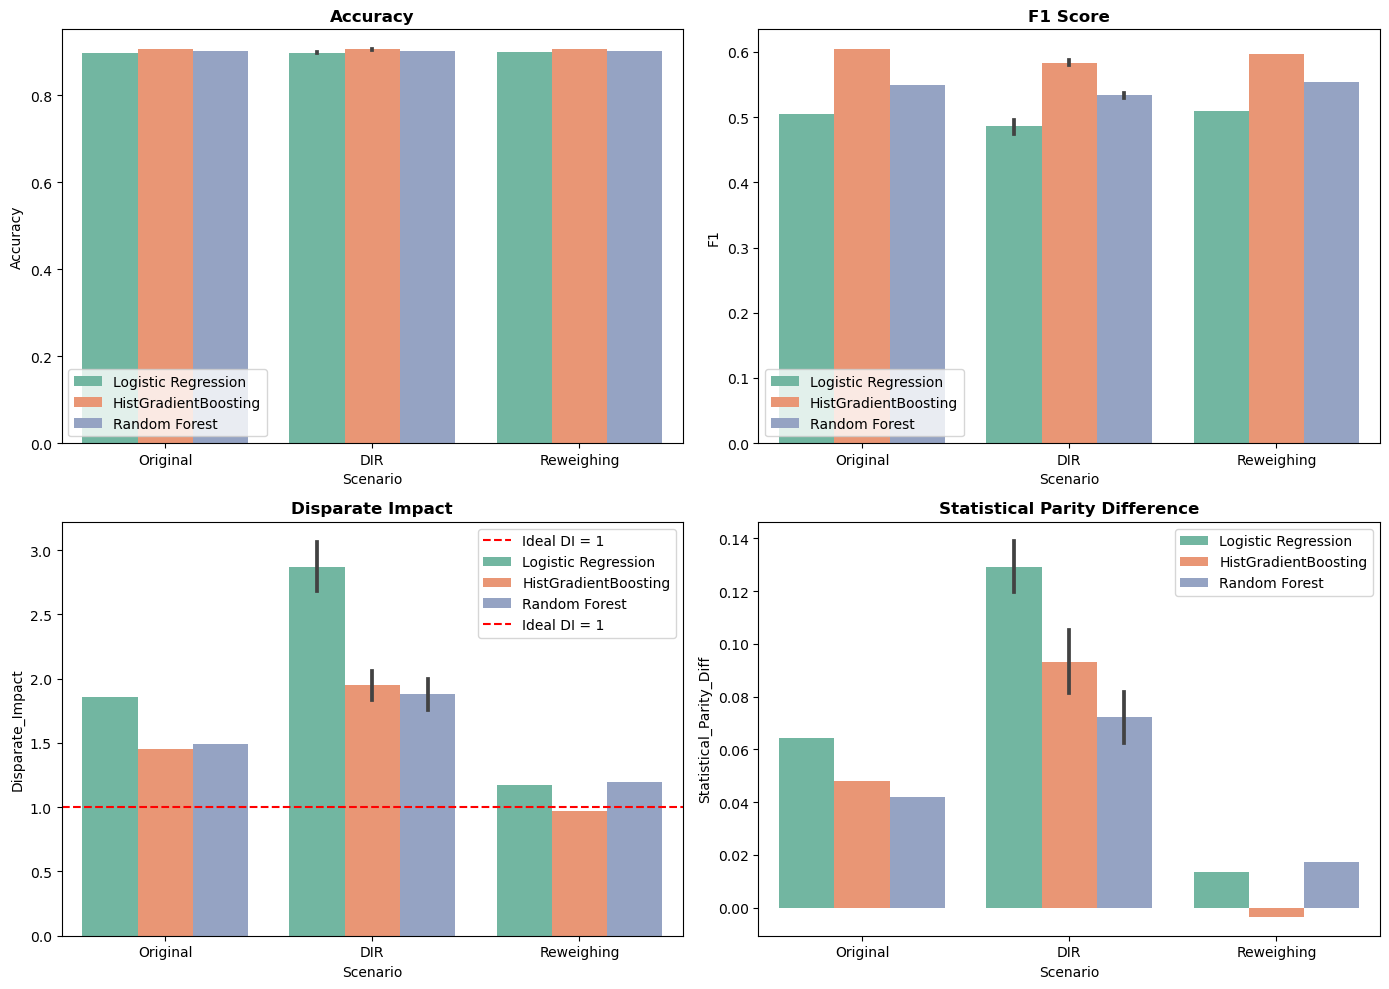

In [300]:
metrics = ['Accuracy', 'F1', 'Disparate_Impact', 'Statistical_Parity_Diff']
melted = results_df.melt(id_vars=['Model', 'Scenario'], value_vars=metrics, 
                         var_name='Metric', value_name='Value')
# Set up the figure with subplots – one subplot per metric
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()  # Flatten to easily iterate over

metric_titles = {
    'Accuracy': 'Accuracy',
    'F1': 'F1 Score',
    'Disparate_Impact': 'Disparate Impact',
    'Statistical_Parity_Diff': 'Statistical Parity Difference'
}

# Plot each metric in a separate subplot
for ax, metric in zip(axes, metrics):
    # Filter data for the current metric
    data_metric = melted[melted['Metric'] == metric]
    
    # Create a grouped bar plot: scenario on x-axis, value on y-axis, hue as model
    sns.barplot(x='Scenario', y='Value', hue='Model', data=data_metric, ax=ax, palette='Set2')
    
    ax.set_title(metric_titles[metric], fontweight='bold')
    ax.set_xlabel('Scenario')
    ax.set_ylabel(metric)
    # Rotate x labels if needed
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    
    # Optionally, show a horizontal line at the ideal reference point for Disparate Impact
    if metric == 'Disparate_Impact':
        ax.axhline(y=1, color='red', linestyle='--', label='Ideal DI = 1')
        # Add a legend entry for the line
        handles, labels = ax.get_legend_handles_labels()
        handles.append(plt.Line2D([0], [0], color='red', linestyle='--'))
        labels.append('Ideal DI = 1')
        ax.legend(handles, labels, loc='best')
    else:
        ax.legend(loc='best')

plt.tight_layout()
plt.show()

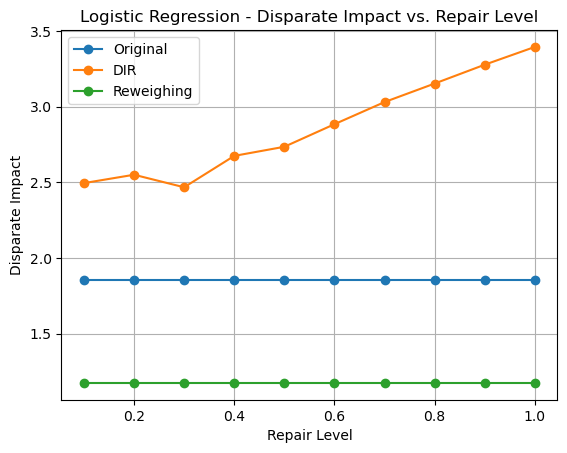

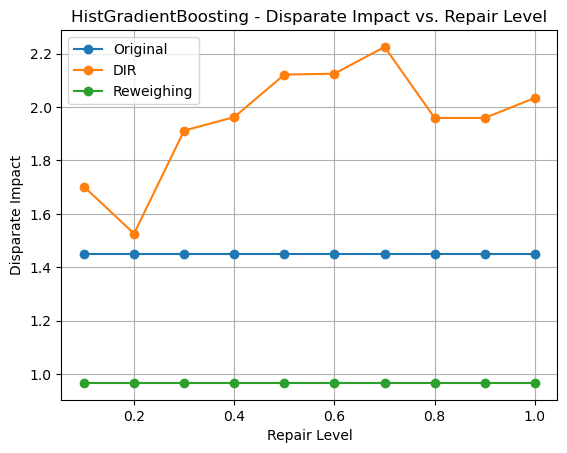

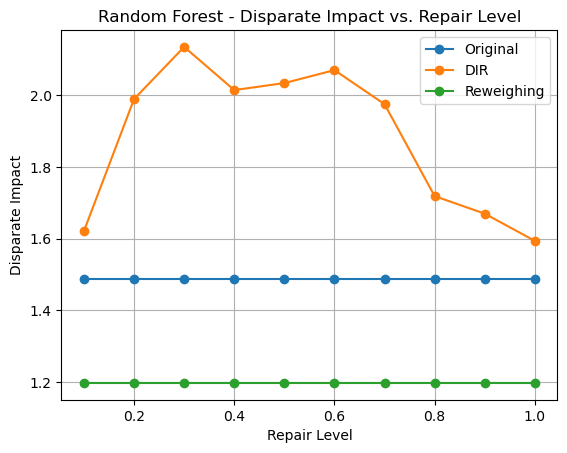

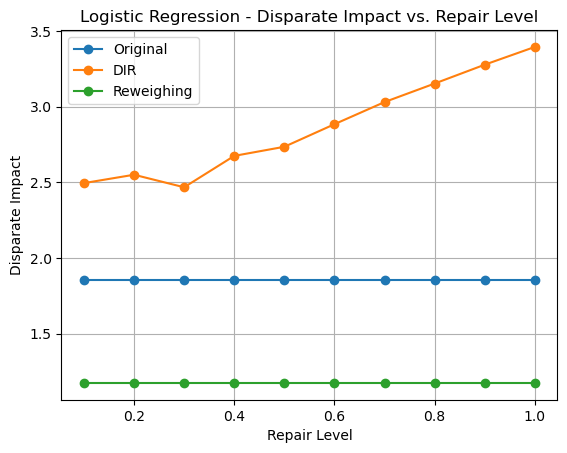

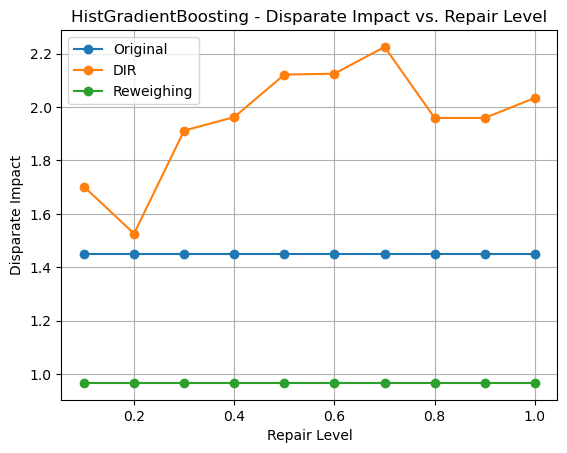

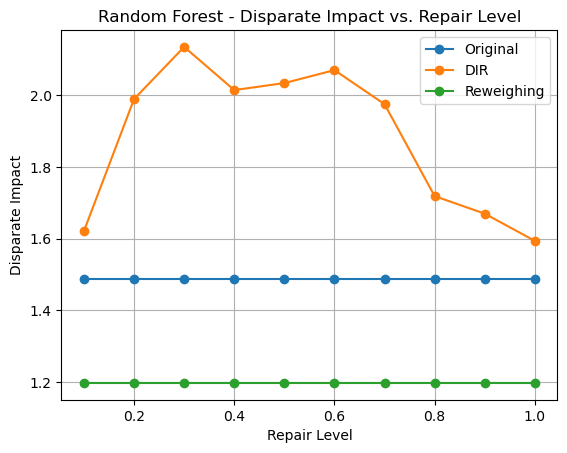

In [286]:
# Disparate Impact vs Repair Level

for model_name in results_df['Model'].unique():
    plt.figure()
    subset = results_df[(results_df['Model'] == model_name)]
    for scenario in ['Original', 'DIR', 'Reweighing']:
        scenario_data = subset[subset['Scenario'] == scenario]
        plt.plot(scenario_data['Repair_Level'], scenario_data['Disparate_Impact'], marker='o', label=scenario)
    plt.title(f"{model_name} - Disparate Impact vs. Repair Level")
    plt.xlabel("Repair Level")
    plt.ylabel("Disparate Impact")
    plt.legend()
    plt.grid(True)
    plt.show()

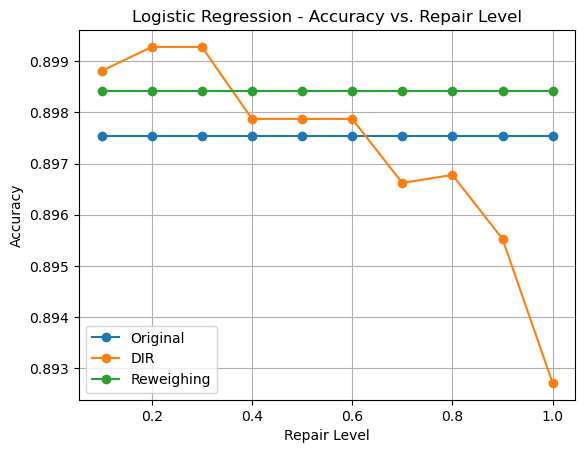

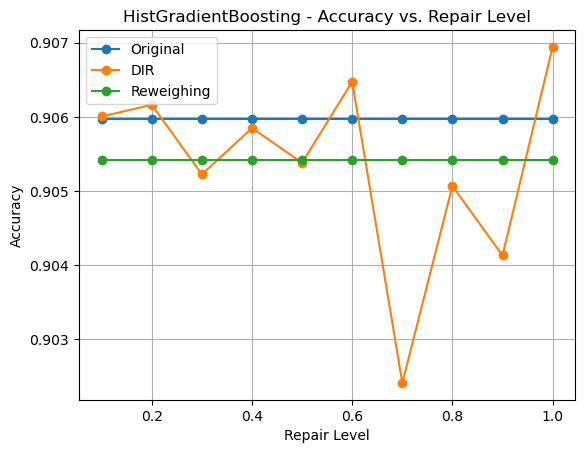

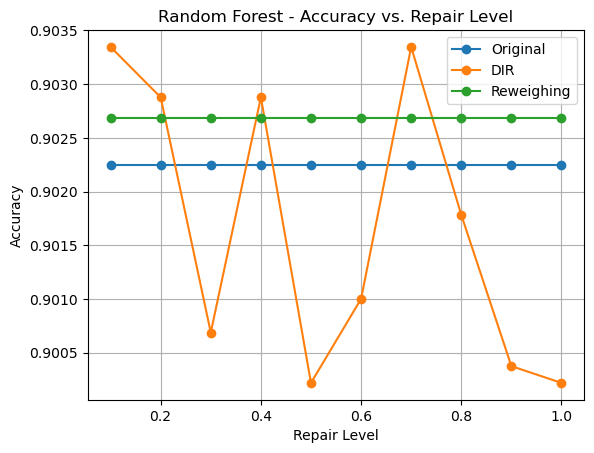

In [287]:
# Accuracy vs Repair Level for Each Model and Scenario
for model_name in results_df['Model'].unique():
    plt.figure()
    subset = results_df[(results_df['Model'] == model_name)]
    for scenario in ['Original', 'DIR', 'Reweighing']:
        scenario_data = subset[subset['Scenario'] == scenario]
        plt.plot(scenario_data['Repair_Level'], scenario_data['Accuracy'], marker='o', label=scenario)
    plt.title(f"{model_name} - Accuracy vs. Repair Level")
    plt.xlabel("Repair Level")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

# Our Experiments before modularizing the code

In [188]:
df = pd.read_csv("preprocessed_bank.csv")
df = df.drop(columns=['Unnamed: 0'])

In [189]:
df

,age,duration,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,job=admin.,job=blue-collar,job=entrepreneur,...,month=oct,month=sep,day_of_week=fri,day_of_week=mon,day_of_week=thu,day_of_week=tue,day_of_week=wed,poutcome=failure,poutcome=nonexistent,y
0,1.0,261.0,1.0,999.0,1.1,93.994,-36.4,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,226.0,1.0,999.0,1.1,93.994,-36.4,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,151.0,1.0,999.0,1.1,93.994,-36.4,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,307.0,1.0,999.0,1.1,93.994,-36.4,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,139.0,1.0,999.0,1.1,93.994,-36.4,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30443,1.0,334.0,1.0,999.0,-1.1,94.767,-50.8,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
30444,1.0,383.0,1.0,999.0,-1.1,94.767,-50.8,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30445,1.0,189.0,2.0,999.0,-1.1,94.767,-50.8,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30446,1.0,442.0,1.0,999.0,-1.1,94.767,-50.8,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [190]:
binary_dataset = BinaryLabelDataset(df=df, 
                                        label_names=['y'], 
                                        protected_attribute_names=['age'],
                                        favorable_label=1.0, 
                                        unfavorable_label=0.0, 
                                   )

In [191]:
privileged_group = [{'age': 1.0}]
unprivileged_group = [{'age': 0.0}]

metrics = BinaryLabelDatasetMetric(binary_dataset,
                              unprivileged_groups = unprivileged_group,
                              privileged_groups = privileged_group)

In [192]:
print(f"Disparate Impact: {np.round(metrics.disparate_impact(), 2)}")
print(f"Statistical Parity Difference: {np.round(metrics.mean_difference(), 2)}")

Disparate Impact: 1.86
Statistical Parity Difference: 0.11


In [193]:
# Subgroups

priviliged_fav = df[(df['age']==1.0) & (df['y']==1.0)]
priviliged_unfav = df[(df['age']==1.0) & (df['y']==0.0)]
unpriviliged_fav = df[(df['age']==0.0) & (df['y']==1.0)]
unpriviliged_unfav = df[(df['age']==0.0) & (df['y']==0.0)]

priviliged_total = df[(df['age']==1.0)]
unpriviliged_total = df[df['age'] == 0.0]

In [194]:
# Number of samples

print(f"Number of samples in Privileged group with Favorable label: {priviliged_fav.shape[0]}\n"
      f"Number of samples in Privileged group with Unfavorable label: {priviliged_unfav.shape[0]}\n"
      f"Number of samples in Unprivileged group with Favorable label: {unpriviliged_fav.shape[0]}\n"
      f"Number of samples in Unprivileged group with Unfavorable label: {unpriviliged_unfav.shape[0]}")

Number of samples in Privileged group with Favorable label: 3659
Number of samples in Privileged group with Unfavorable label: 25926
Number of samples in Unprivileged group with Favorable label: 199
Number of samples in Unprivileged group with Unfavorable label: 664


In [195]:
# Metrics - Disparate Impact

p_favorable_unprivileged = len(unpriviliged_fav) / len(unpriviliged_total)
p_favorable_privileged = len(priviliged_fav) / len(priviliged_total)

disparate_impact = p_favorable_unprivileged / p_favorable_privileged
print(f"Disparate Impact: {np.round(disparate_impact, 2)}")

# Statistical Parity Difference

spd = p_favorable_unprivileged - p_favorable_privileged
print(f"Statistical Parity Difference: {np.round(spd, 2)}")


Disparate Impact: 1.86
Statistical Parity Difference: 0.11


# Preparing Datasets

In [213]:
# Original

orgiginal_df_train, orgiginal_df_test = train_test_split(df, test_size=0.3, random_state=42, shuffle=True)

X_train_original = orgiginal_df_train.drop(columns=['y'])
y_train_original = orgiginal_df_train['y']

X_test_original = orgiginal_df_test.drop(columns=['y'])
y_test_original = orgiginal_df_test['y']

In [226]:
# Transformed with Disparate Impact Remover

dir = DisparateImpactRemover(repair_level=0.1) 

transformed_data_dir = dir.fit_transform(binary_dataset)

transformed_dataframe, _ = transformed_data_dir.convert_to_dataframe()

transformed_dataframe_train, transformed_dataframe_test = train_test_split(transformed_dataframe, 
                                         test_size=0.3, 
                                         random_state=42, 
                                         shuffle=True)

X_train_transformed = transformed_dataframe_train.drop(columns=['y'])
y_train_transformed = transformed_dataframe_train['y']

X_test_transformed = transformed_dataframe_test.drop(columns=['y'])
y_test_transformed = transformed_dataframe_test['y']


In [215]:
# Transformed with Reweiging

reweigher = Reweighing(unprivileged_groups=unprivileged_group, privileged_groups=privileged_group)

binary_dataset_train = BinaryLabelDataset(df=orgiginal_df_train, 
                                        label_names=['y'], 
                                        protected_attribute_names=['age'],
                                        favorable_label=1, 
                                        unfavorable_label=0, 
                                   )

binary_dataset_reweighed_train = reweigher.fit_transform(binary_dataset_train)


reweighed_dataframe_train, reweighed_weights_metadata = binary_dataset_reweighed_train.convert_to_dataframe()

# We should not transform test dataset when we apply Reweiging, so, we will use  X_test_original, y_test_original

X_train_rw = reweighed_dataframe_train.drop(columns=['y'])
y_train_rw = reweighed_dataframe_train['y']

# Training

In [227]:
from sklearn.exceptions import ConvergenceWarning
import warnings

# Ignore only ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
# First Model - Logistic Regression 
lr_classifier = LogisticRegression(max_iter=2000,random_state=42)

# Original
lr_classifier.fit(X_train_original,y_train_original)
lr_predictions_original = lr_classifier.predict(X_test_original)

lr_accuracy = accuracy_score(y_test_original,lr_predictions_original)
lr_f1 = f1_score(y_test_original, lr_predictions_original)

print(f"Logistic Regression Accuracy (Original): {np.round(lr_accuracy,6)}")
print(f"Logistic Regression F1 Score (Original): {np.round(lr_f1,6)}\n")

# After DIR
lr_classifier.fit(X_train_transformed,y_train_transformed)
lr_predictions_transformed_dir = lr_classifier.predict(X_test_transformed)

lr_accuracy = accuracy_score(y_test_transformed,lr_predictions_transformed_dir)
lr_f1 = f1_score(y_test_transformed, lr_predictions_transformed_dir)

print(f"Logistic Regression Accuracy (After DIR): {np.round(lr_accuracy,6)}")
print(f"Logistic Regression F1 Score (After DIR): {np.round(lr_f1,6)}\n")

# After Rew
lr_classifier.fit(X_train_rw, y_train_rw, sample_weight = binary_dataset_reweighed_train.instance_weights)
lr_predictions_transformed_rew = lr_classifier.predict(X_test_original)

lr_accuracy = accuracy_score(y_test_original,lr_predictions_transformed_rew)
lr_f1 = f1_score(y_test_original, lr_predictions_transformed_rew)

print(f"Logistic Regression Accuracy (After Rew): {np.round(lr_accuracy,6)}")
print(f"Logistic Regression F1 Score (After Rew): {np.round(lr_f1,6)}\n")

Logistic Regression Accuracy (Original): 0.897537
Logistic Regression F1 Score (Original): 0.504237

Logistic Regression Accuracy (After DIR): 0.897865
Logistic Regression F1 Score (After DIR): 0.507652

Logistic Regression Accuracy (After Rew): 0.898413
Logistic Regression F1 Score (After Rew): 0.509514



In [231]:
# Second Model - Random Forest

from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3, scoring='f1', n_jobs=-1, verbose=0)



grid_search.fit(X_train_original,y_train_original)
best_params = grid_search.best_params_
rf_model = RandomForestClassifier(random_state=42, **best_params)

# Original
rf_model.fit(X_train_original, y_train_original)
rf_predictions_original = rf_model.predict(X_test_original)

rf_accuracy = accuracy_score(y_test_original, rf_predictions_original)
rf_f1 = f1_score(y_test_original, rf_predictions_original)

print(f"Random Forest Accuracy (Original): {np.round(rf_accuracy,4)}")
print(f"Random Forest F1 Score (Original): {np.round(rf_f1,4)}\n")


# After DIR
rf_model.fit(X_train_transformed, y_train_transformed)
rf_predictions_transformed_dir = rf_model.predict(X_test_transformed)

rf_accuracy = accuracy_score(y_test_transformed, rf_predictions_transformed_dir)
rf_f1 = f1_score(y_test_transformed, rf_predictions_transformed_dir)

print(f"Random Forest Accuracy (After DIR): {np.round(rf_accuracy,4)}")
print(f"Random Forest F1 Score (After DIR): {np.round(rf_f1,4)}\n")

# After Rew
rf_model.fit(X_train_rw, y_train_rw, sample_weight=binary_dataset_reweighed_train.instance_weights)

rf_predictions_transformed_rew = rf_model.predict(X_test_original)
rf_accuracy = accuracy_score(y_test_original,rf_predictions_transformed_rew)
rf_f1 = f1_score(y_test_original, rf_predictions_transformed_rew)

print(f"Random Forest Accuracy (After Rew): {np.round(rf_accuracy,4)}")
print(f"Random Forest F1 Score (After Rew): {np.round(rf_f1,4)}\n")

Random Forest Accuracy (Original): 0.9022
Random Forest F1 Score (Original): 0.5497

Random Forest Accuracy (After DIR): 0.9037
Random Forest F1 Score (After DIR): 0.5631

Random Forest Accuracy (After Rew): 0.9027
Random Forest F1 Score (After Rew): 0.5544



In [228]:
# Thirds Model - HistGradientBoostingClassifier 
hgb_model = HistGradientBoostingClassifier(random_state=42)

# Original
hgb_model.fit(X_train_original,y_train_original)
hgb_predictions_original = hgb_model.predict(X_test_original)

hgb_accuracy = accuracy_score(y_test_original,hgb_predictions_original)
hgb_f1 = f1_score(y_test_original, hgb_predictions_original)

print(f"HistGradientBoosting Accuracy (Original): {np.round(hgb_accuracy,4)}")
print(f"HistGradientBoosting F1 Score (Original): {np.round(hgb_f1,4)}\n")

# After DIR
hgb_model.fit(X_train_transformed,y_train_transformed)
hgb_predictions_transformed_dir = hgb_model.predict(X_test_transformed)

hgb_accuracy = accuracy_score(y_test_transformed,hgb_predictions_transformed_dir)
hgb_f1 = f1_score(y_test_transformed, hgb_predictions_transformed_dir)

print(f"HistGradientBoosting Accuracy (After DIR): {np.round(hgb_accuracy,4)}")
print(f"HistGradientBoosting F1 Score (After DIR): {np.round(hgb_f1,4)}\n")

# After Rew
hgb_model.fit(X_train_rw, y_train_rw, sample_weight = binary_dataset_reweighed_train.instance_weights)
hgb_predictions_transformed_rew = hgb_model.predict(X_test_original)

hgb_accuracy = accuracy_score(y_test_original,hgb_predictions_transformed_rew)
hgb_f1 = f1_score(y_test_original, hgb_predictions_transformed_rew)

print(f"HistGradientBoosting Accuracy (After Rew): {np.round(hgb_accuracy,4)}")
print(f"HistGradientBoosting F1 Score (After Rew): {np.round(hgb_f1,4)}\n")

HistGradientBoosting Accuracy (Original): 0.906
HistGradientBoosting F1 Score (Original): 0.6043

HistGradientBoosting Accuracy (After DIR): 0.9051
HistGradientBoosting F1 Score (After DIR): 0.5984

HistGradientBoosting Accuracy (After Rew): 0.9054
HistGradientBoosting F1 Score (After Rew): 0.5974



In [229]:
# Re-create the test BinaryLabelDataset using the original test set

test_dataset_original = BinaryLabelDataset(
    df=orgiginal_df_test,
    label_names=['y'],
    protected_attribute_names=['age'],
    favorable_label=1,
    unfavorable_label=0
)

# Create a predicted dataset by copying test_dataset_original
predicted_dataset_original = test_dataset_original.copy(deepcopy=True)
predicted_dataset_original.labels = lr_predictions_original.reshape(-1,1)

# Evaluate fairness
class_metric_original = ClassificationMetric(
    test_dataset_original, 
    predicted_dataset_original, 
    unprivileged_groups=unprivileged_group, 
    privileged_groups=privileged_group
)

print("Fairness metrics for Logistic Regression (Original):")
print(f"  Disparate Impact: {class_metric_original.disparate_impact():.3f}")
print(f"  Statistical Parity Difference: {class_metric_original.statistical_parity_difference():.3f}")
print(f"  Equal Opportunity Difference: {class_metric_original.equal_opportunity_difference():.3f}")
print(f"  Average Odds Difference: {class_metric_original.average_odds_difference():.3f}")

Fairness metrics for Logistic Regression (Original):
  Disparate Impact: 1.857
  Statistical Parity Difference: 0.064
  Equal Opportunity Difference: -0.006
  Average Odds Difference: 0.017


In [230]:
# After DIR
test_dataset_dir = BinaryLabelDataset(
    df=transformed_dataframe_test,
    label_names=['y'],
    protected_attribute_names=['age'],
    favorable_label=1,
    unfavorable_label=0
)

predicted_dataset_dir = test_dataset_dir.copy(deepcopy=True)
predicted_dataset_dir.labels = lr_predictions_transformed_dir.reshape(-1,1)

class_metric_dir = ClassificationMetric(
    test_dataset_dir, 
    predicted_dataset_dir, 
    unprivileged_groups=unprivileged_group, 
    privileged_groups=privileged_group
)

print("Fairness metrics for Logistic Regression (After DIR):")
print(f"  Disparate Impact: {class_metric_dir.disparate_impact():.3f}")
print(f"  Statistical Parity Difference: {class_metric_dir.statistical_parity_difference():.3f}")
print(f"  Equal Opportunity Difference: {class_metric_dir.equal_opportunity_difference():.3f}")
print(f"  Average Odds Difference: {class_metric_dir.average_odds_difference():.3f}")

Fairness metrics for Logistic Regression (After DIR):
  Disparate Impact: 1.837
  Statistical Parity Difference: 0.064
  Equal Opportunity Difference: 0.008
  Average Odds Difference: 0.021


In [220]:
# After Reweighing, remember you used original test set for evaluation
test_dataset_rw = BinaryLabelDataset(
    df=orgiginal_df_test,
    label_names=['y'],
    protected_attribute_names=['age'],
    favorable_label=1,
    unfavorable_label=0
)

predicted_dataset_rw = test_dataset_rw.copy(deepcopy=True)
predicted_dataset_rw.labels = lr_predictions_transformed_rew.reshape(-1,1)

class_metric_rw = ClassificationMetric(
    test_dataset_rw, 
    predicted_dataset_rw, 
    unprivileged_groups=unprivileged_group, 
    privileged_groups=privileged_group
)

print("Fairness metrics for Logistic Regression (After Reweighing):")
print(f"  Disparate Impact: {class_metric_rw.disparate_impact():.3f}")
print(f"  Statistical Parity Difference: {class_metric_rw.statistical_parity_difference():.3f}")
print(f"  Equal Opportunity Difference: {class_metric_rw.equal_opportunity_difference():.3f}")
print(f"  Average Odds Difference: {class_metric_rw.average_odds_difference():.3f}")

Fairness metrics for Logistic Regression (After Reweighing):
  Disparate Impact: 1.174
  Statistical Parity Difference: 0.013
  Equal Opportunity Difference: -0.102
  Average Odds Difference: -0.051


In [233]:
# Re-create the test BinaryLabelDataset using the original test set

test_dataset_original = BinaryLabelDataset(
    df=orgiginal_df_test,
    label_names=['y'],
    protected_attribute_names=['age'],
    favorable_label=1,
    unfavorable_label=0
)

# Create a predicted dataset by copying test_dataset_original
predicted_dataset_original = test_dataset_original.copy(deepcopy=True)
predicted_dataset_original.labels = hgb_predictions_original.reshape(-1,1)

# Evaluate fairness
class_metric_original = ClassificationMetric(
    test_dataset_original, 
    predicted_dataset_original, 
    unprivileged_groups=unprivileged_group, 
    privileged_groups=privileged_group
)

print("Fairness metrics for HistGradientBoosting (Original):")
print(f"  Disparate Impact: {class_metric_original.disparate_impact():.3f}")
print(f"  Statistical Parity Difference: {class_metric_original.statistical_parity_difference():.3f}")
print(f"  Equal Opportunity Difference: {class_metric_original.equal_opportunity_difference():.3f}")
print(f"  Average Odds Difference: {class_metric_original.average_odds_difference():.3f}")

Fairness metrics for HistGradientBoosting (Original):
  Disparate Impact: 1.451
  Statistical Parity Difference: 0.048
  Equal Opportunity Difference: -0.075
  Average Odds Difference: -0.027


In [235]:
# After DIR
test_dataset_dir = BinaryLabelDataset(
    df=transformed_dataframe_test,
    label_names=['y'],
    protected_attribute_names=['age'],
    favorable_label=1,
    unfavorable_label=0
)

predicted_dataset_dir = test_dataset_dir.copy(deepcopy=True)
predicted_dataset_dir.labels = hgb_predictions_transformed_dir.reshape(-1,1)

class_metric_dir = ClassificationMetric(
    test_dataset_dir, 
    predicted_dataset_dir, 
    unprivileged_groups=unprivileged_group, 
    privileged_groups=privileged_group
)

print("Fairness metrics for HistGradientBoosting (After DIR):")
print(f"  Disparate Impact: {class_metric_dir.disparate_impact():.3f}")
print(f"  Statistical Parity Difference: {class_metric_dir.statistical_parity_difference():.3f}")
print(f"  Equal Opportunity Difference: {class_metric_dir.equal_opportunity_difference():.3f}")
print(f"  Average Odds Difference: {class_metric_dir.average_odds_difference():.3f}")

Fairness metrics for HistGradientBoosting (After DIR):
  Disparate Impact: 1.582
  Statistical Parity Difference: 0.061
  Equal Opportunity Difference: -0.048
  Average Odds Difference: -0.008


In [234]:
# After Reweighing, remember you used original test set for evaluation
test_dataset_rw = BinaryLabelDataset(
    df=orgiginal_df_test,
    label_names=['y'],
    protected_attribute_names=['age'],
    favorable_label=1,
    unfavorable_label=0
)

predicted_dataset_rw = test_dataset_rw.copy(deepcopy=True)
predicted_dataset_rw.labels = hgb_predictions_transformed_rew.reshape(-1,1)

class_metric_rw = ClassificationMetric(
    test_dataset_rw, 
    predicted_dataset_rw, 
    unprivileged_groups=unprivileged_group, 
    privileged_groups=privileged_group
)

print("Fairness metrics for HistGradientBoosting (After Reweighing):")
print(f"  Disparate Impact: {class_metric_rw.disparate_impact():.3f}")
print(f"  Statistical Parity Difference: {class_metric_rw.statistical_parity_difference():.3f}")
print(f"  Equal Opportunity Difference: {class_metric_rw.equal_opportunity_difference():.3f}")
print(f"  Average Odds Difference: {class_metric_rw.average_odds_difference():.3f}")

Fairness metrics for HistGradientBoosting (After Reweighing):
  Disparate Impact: 0.967
  Statistical Parity Difference: -0.004
  Equal Opportunity Difference: -0.225
  Average Odds Difference: -0.113


In [236]:
# Re-create the test BinaryLabelDataset using the original test set

test_dataset_original = BinaryLabelDataset(
    df=orgiginal_df_test,
    label_names=['y'],
    protected_attribute_names=['age'],
    favorable_label=1,
    unfavorable_label=0
)

# Create a predicted dataset by copying test_dataset_original
predicted_dataset_original = test_dataset_original.copy(deepcopy=True)
predicted_dataset_original.labels = rf_predictions_original.reshape(-1,1)

# Evaluate fairness
class_metric_original = ClassificationMetric(
    test_dataset_original, 
    predicted_dataset_original, 
    unprivileged_groups=unprivileged_group, 
    privileged_groups=privileged_group
)

print("Fairness metrics for Random Forest (Original):")
print(f"  Disparate Impact: {class_metric_original.disparate_impact():.3f}")
print(f"  Statistical Parity Difference: {class_metric_original.statistical_parity_difference():.3f}")
print(f"  Equal Opportunity Difference: {class_metric_original.equal_opportunity_difference():.3f}")
print(f"  Average Odds Difference: {class_metric_original.average_odds_difference():.3f}")

Fairness metrics for Random Forest (Original):
  Disparate Impact: 1.488
  Statistical Parity Difference: 0.042
  Equal Opportunity Difference: -0.085
  Average Odds Difference: -0.029


In [238]:
# After DIR
test_dataset_dir = BinaryLabelDataset(
    df=transformed_dataframe_test,
    label_names=['y'],
    protected_attribute_names=['age'],
    favorable_label=1,
    unfavorable_label=0
)

predicted_dataset_dir = test_dataset_dir.copy(deepcopy=True)
predicted_dataset_dir.labels = rf_predictions_transformed_dir.reshape(-1,1)

class_metric_dir = ClassificationMetric(
    test_dataset_dir, 
    predicted_dataset_dir, 
    unprivileged_groups=unprivileged_group, 
    privileged_groups=privileged_group
)

print("Fairness metrics for Random Forest (After DIR):")
print(f"  Disparate Impact: {class_metric_dir.disparate_impact():.3f}")
print(f"  Statistical Parity Difference: {class_metric_dir.statistical_parity_difference():.3f}")
print(f"  Equal Opportunity Difference: {class_metric_dir.equal_opportunity_difference():.3f}")
print(f"  Average Odds Difference: {class_metric_dir.average_odds_difference():.3f}")

Fairness metrics for Random Forest (After DIR):
  Disparate Impact: 1.606
  Statistical Parity Difference: 0.054
  Equal Opportunity Difference: -0.068
  Average Odds Difference: -0.016


In [239]:
# After Reweighing, remember you used original test set for evaluation
test_dataset_rw = BinaryLabelDataset(
    df=orgiginal_df_test,
    label_names=['y'],
    protected_attribute_names=['age'],
    favorable_label=1,
    unfavorable_label=0
)

predicted_dataset_rw = test_dataset_rw.copy(deepcopy=True)
predicted_dataset_rw.labels = rf_predictions_transformed_rew.reshape(-1,1)

class_metric_rw = ClassificationMetric(
    test_dataset_rw, 
    predicted_dataset_rw, 
    unprivileged_groups=unprivileged_group, 
    privileged_groups=privileged_group
)

print("Fairness metrics for Random Forest (After Reweighing):")
print(f"  Disparate Impact: {class_metric_rw.disparate_impact():.3f}")
print(f"  Statistical Parity Difference: {class_metric_rw.statistical_parity_difference():.3f}")
print(f"  Equal Opportunity Difference: {class_metric_rw.equal_opportunity_difference():.3f}")
print(f"  Average Odds Difference: {class_metric_rw.average_odds_difference():.3f}")

Fairness metrics for Random Forest (After Reweighing):
  Disparate Impact: 1.197
  Statistical Parity Difference: 0.017
  Equal Opportunity Difference: -0.110
  Average Odds Difference: -0.054
